## 编辑距离定义

编辑距离（Minimum Edit Distance，MED），由俄罗斯科学家 Vladimir Levenshtein 在1965年提出，也因此而得名 Levenshtein Distance。在信息论、语言学和计算机科学领域，Levenshtein Distance 是用来度量两个序列相似程度的指标。通俗地来讲，编辑距离指的是在两个单词之间，由其中一个单词转换为另一个单词所需要的最少单字符编辑操作次数。
在这里定义的单字符编辑操作有三种：

 - 插入（Insertion）
 - 删除（Deletion）
 - 替换（Substitution


我们将两个字符串 a,b 的 Levenshtein Distance 表示为 lev_{a,b}(|a|, |b|)，其中|a| 和 |b| 分别对应a,b 的长度。那么，在这里 lev_{a,b}(|a|, |b|) 可用如下的数学语言描述：
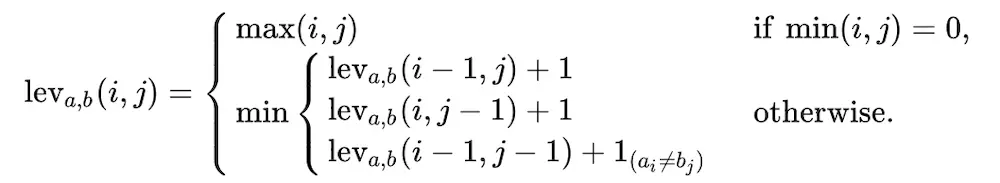

 - lev_{a,b}(i, j) 指的是 a 中前 i 个字符和 b 中前 j 个字符之间的距离。为了方便理解，这里的i,j可以看作是a,b的长度。这里的字符串的字符 index 从 1 开始，因此最后的编辑距离便是 i = |a|, j = |b| 时的距离：  lev_{a,b}(|a|, |b|)
 - 当 min(i, j) = 0 的时候，对应着a 中前 i 个字符和 b 中前 j 个字符，此时的 i,j 有一个值为 0 ，所以它们之间的距离为 max(i, j)，即 i,j 中的最大者。
 - 当 min(i, j) != 0 的时候，lev_{a,b}(|a|, |b|) 为如下三项的最小值：
 1. lev_{a,b}(i-1, j) 表示 删除 a_i
 2. lev_{a,b}(i, j-1) 表示 插入 b_j
 3. lev_{a,b}(i-1, j-1)+1  表示 替换 b_j

In [42]:
from functools import lru_cache

solution = {}

@lru_cache(maxsize=2**10)
def edit_distance(string1, string2):
    
    if len(string1) == 0: return len(string2)
    if len(string2) == 0: return len(string1)
    
    tail_s1 = string1[-1]
    tail_s2 = string2[-1]
    
    candidates = [
        (edit_distance(string1[:-1], string2) + 1, 'DEL {}'.format(tail_s1)),  # string 1 delete tail
        (edit_distance(string1, string2[:-1]) + 1, 'ADD {}'.format(tail_s2)),  # string 1 add tail of string2
    ]
    
    if tail_s1 == tail_s2:
        both_forward = (edit_distance(string1[:-1], string2[:-1]) + 0, '')
    else:
        both_forward = (edit_distance(string1[:-1], string2[:-1]) + 1, 'SUB {} => {}'.format(tail_s1, tail_s2))

    candidates.append(both_forward)
    
    min_distance, operation = min(candidates, key=lambda x: x[0])
    
#     print(min_distance, operation)
    
    solution[(string1, string2)] = operation 
    
    return min_distance

In [44]:
edit_distance('lvoe&peac', 'love&peace')

3

In [45]:
solution

{('l', 'l'): '',
 ('l', 'lo'): 'ADD o',
 ('l', 'lov'): 'ADD v',
 ('l', 'love'): 'ADD e',
 ('l', 'love&'): 'ADD &',
 ('l', 'love&p'): 'ADD p',
 ('l', 'love&pe'): 'ADD e',
 ('l', 'love&pea'): 'ADD a',
 ('l', 'love&peac'): 'ADD c',
 ('l', 'love&peace'): 'ADD e',
 ('lv', 'l'): 'DEL v',
 ('lv', 'lo'): 'SUB v => o',
 ('lv', 'lov'): '',
 ('lv', 'love'): 'ADD e',
 ('lv', 'love&'): 'ADD &',
 ('lv', 'love&p'): 'ADD p',
 ('lv', 'love&pe'): 'ADD e',
 ('lv', 'love&pea'): 'ADD a',
 ('lv', 'love&peac'): 'ADD c',
 ('lv', 'love&peace'): 'ADD e',
 ('lvo', 'l'): 'DEL o',
 ('lvo', 'lo'): '',
 ('lvo', 'lov'): 'DEL o',
 ('lvo', 'love'): 'SUB o => e',
 ('lvo', 'love&'): 'ADD &',
 ('lvo', 'love&p'): 'ADD p',
 ('lvo', 'love&pe'): 'ADD e',
 ('lvo', 'love&pea'): 'ADD a',
 ('lvo', 'love&peac'): 'ADD c',
 ('lvo', 'love&peace'): 'ADD e',
 ('lvoe', 'l'): 'DEL e',
 ('lvoe', 'lo'): 'DEL e',
 ('lvoe', 'lov'): 'SUB e => v',
 ('lvoe', 'love'): '',
 ('lvoe', 'love&'): 'ADD &',
 ('lvoe', 'love&p'): 'ADD p',
 ('lvoe', 'love

In [ ]:
def parse_solution(src, dst):
    pass
    